# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv

# Import API key, Jupyter is working funky with multiple open files, so renamed the api key file
from my_api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [42]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

652

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [43]:
# Create an empty list to store the responses
response_json = []

# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Make a request for each of the indices
for x in range(len(cities)):

    query_url = url + "appid=" + api_key + "&q=" + str(cities[x])
 
    print(f"Processing Record {x} | city {cities[x]}")

    # Get one of the posts
    post_response = requests.get(query_url)
    
    # Save post's JSON
    response_json.append(post_response.json())
    
    if (x != 0 and x%60 == 0) :
        time.sleep(60)


Processing Record 0 | city portland
Processing Record 1 | city torbay
Processing Record 2 | city butaritari
Processing Record 3 | city mahebourg
Processing Record 4 | city castro
Processing Record 5 | city tuktoyaktuk
Processing Record 6 | city maceio
Processing Record 7 | city kalmunai
Processing Record 8 | city san pedro de macoris
Processing Record 9 | city hobart
Processing Record 10 | city general roca
Processing Record 11 | city avarua
Processing Record 12 | city naze
Processing Record 13 | city hilo
Processing Record 14 | city busselton
Processing Record 15 | city wajir
Processing Record 16 | city bata
Processing Record 17 | city talnakh
Processing Record 18 | city veraval
Processing Record 19 | city rio bravo
Processing Record 20 | city barrow
Processing Record 21 | city hermanus
Processing Record 22 | city nemuro
Processing Record 23 | city jasper
Processing Record 24 | city porto novo
Processing Record 25 | city rikitea
Processing Record 26 | city cabedelo
Processing Record 2

Processing Record 218 | city saleaula
Processing Record 219 | city bathurst
Processing Record 220 | city vila velha
Processing Record 221 | city vaitupu
Processing Record 222 | city belushya guba
Processing Record 223 | city aldan
Processing Record 224 | city kenai
Processing Record 225 | city martapura
Processing Record 226 | city thompson
Processing Record 227 | city saint-pierre
Processing Record 228 | city saldanha
Processing Record 229 | city saskylakh
Processing Record 230 | city samalaeulu
Processing Record 231 | city abiramam
Processing Record 232 | city campo maior
Processing Record 233 | city makakilo city
Processing Record 234 | city saint-joseph
Processing Record 235 | city aklavik
Processing Record 236 | city belmopan
Processing Record 237 | city talaya
Processing Record 238 | city cayenne
Processing Record 239 | city stoyba
Processing Record 240 | city huejuquilla el alto
Processing Record 241 | city angouleme
Processing Record 242 | city attawapiskat
Processing Record 24

Processing Record 433 | city keti bandar
Processing Record 434 | city xinye
Processing Record 435 | city impfondo
Processing Record 436 | city paamiut
Processing Record 437 | city sao joao da barra
Processing Record 438 | city santa isabel
Processing Record 439 | city rochefort
Processing Record 440 | city kuzmolovskiy
Processing Record 441 | city chaochou
Processing Record 442 | city chapais
Processing Record 443 | city ascension
Processing Record 444 | city uppsala
Processing Record 445 | city tianpeng
Processing Record 446 | city imbituba
Processing Record 447 | city broome
Processing Record 448 | city mtambile
Processing Record 449 | city ostrovnoy
Processing Record 450 | city erenhot
Processing Record 451 | city loukhi
Processing Record 452 | city boyuibe
Processing Record 453 | city palana
Processing Record 454 | city pitimbu
Processing Record 455 | city valparaiso
Processing Record 456 | city mastic beach
Processing Record 457 | city hun
Processing Record 458 | city paucartambo


Processing Record 648 | city portree
Processing Record 649 | city mayo
Processing Record 650 | city rawson
Processing Record 651 | city chita


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
# write response_json to csv file
df = pd.DataFrame(response_json)

df.to_csv(output_data_file, encoding="utf-8", index=False)

In [45]:
city_list = []
country_list = []
cloud_list = []
date_list = []
humid_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []


for index in range(len(response_json)):
    if (response_json[index]["cod"] == 200) :
        city_list.append(response_json[index]["name"])
        country_list.append(response_json[index]["sys"]["country"])        
        cloud_list.append(response_json[index]["clouds"]["all"])
        date_list.append(response_json[index]["dt"])  
        humid_list.append(response_json[index]["main"]["humidity"])        
        lat_list.append(response_json[index]["coord"]["lat"])   
        lng_list.append(response_json[index]["coord"]["lon"])           
        max_temp_list.append(response_json[index]["main"]["temp_max"])        
        wind_speed_list.append(response_json[index]["wind"]["speed"])    
        

my_df = pd.DataFrame({"City" : city_list, "Cloudiness" : cloud_list, "Country" : country_list, "Date" : date_list, 
                      "Humidity" : humid_list, "Lat" : lat_list, "Lng" : lng_list, 
                      "Max Temp" : max_temp_list, "Wind Speed" : wind_speed_list})

my_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Portland,75,US,1562252815,45,43.66,-70.25,304.260,2.07
1,Torbay,90,CA,1562253014,87,47.66,-52.73,285.930,3.60
2,Butaritari,100,KI,1562253014,70,3.07,172.79,301.739,2.29
3,Mahebourg,75,MU,1562253015,73,-20.41,57.70,296.150,3.10
4,Castro,40,CL,1562253015,100,-42.48,-73.76,276.150,1.50


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

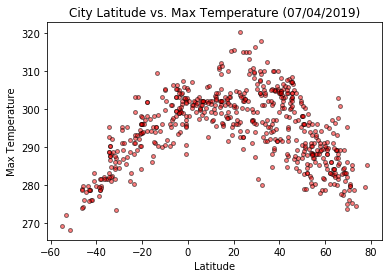

In [71]:
#Plot Latitude vs. Max Temperature  
plt.scatter(my_df["Lat"], my_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", s=np.pi*5, alpha=0.5)
plt.title('City Latitude vs. Max Temperature (07/04/2019)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Save Figure
plt.savefig("Images/AshokWeatherScatter1.png")

plt.show()

#### Latitude vs. Humidity Plot

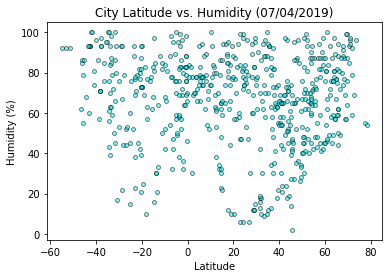

In [72]:
#Plot Latitude vs. Humidity  
plt.scatter(my_df["Lat"], my_df["Humidity"], marker="o", facecolors="aqua", edgecolors="black", s=np.pi*5, alpha=0.5)
plt.title('City Latitude vs. Humidity (07/04/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save Figure
plt.savefig("Images/AshokWeatherScatter2.png")

plt.show()

#### Latitude vs. Cloudiness Plot

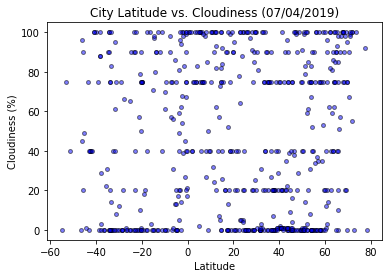

In [73]:
#Plot Latitude vs. Cloudiness   
plt.scatter(my_df["Lat"], my_df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", s=np.pi*5, alpha=0.5)
plt.title('City Latitude vs. Cloudiness (07/04/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save Figure
plt.savefig("Images/AshokWeatherScatter3.png")

plt.show()

#### Latitude vs. Wind Speed Plot

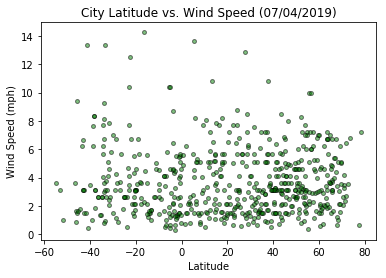

In [74]:
#Plot Latitude vs. Wind Speed  
plt.scatter(my_df["Lat"], my_df["Wind Speed"], marker="o", facecolors="green", edgecolors="black", s=np.pi*5, alpha=0.5)
plt.title('City Latitude vs. Wind Speed (07/04/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save Figure
plt.savefig("Images/AshokWeatherScatter4.png")

plt.show()